In [22]:
!pip install pandas matplotlib seaborn



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HR_Analytics.csv to HR_Analytics (1).csv
User uploaded file "HR_Analytics (1).csv" with length 258595 bytes


In [25]:
# Load the dataset
df = pd.read_csv('HR_Analytics.csv')


In [26]:
hr_marketing = df[df['Department'].isin(['HR', 'Marketing'])]


In [27]:
# Load the dataset
df = pd.read_csv('HR_Analytics.csv')

# Check for possible column names related to salary
print(df.columns)

# Assuming a column named 'MonthlyIncome' exists (replace with actual if different)
hr_marketing = df[df['Department'].isin(['HR', 'Marketing'])]

salaries = hr_marketing['MonthlyIncome']

variance = salaries.var()
std_dev = salaries.std()
IQR = salaries.quantile(0.75) - salaries.quantile(0.25)

print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Interquartile Range (IQR):", IQR)

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Variance: nan
Standard Deviation: nan
Interquartile Range (IQR): nan


In [33]:
# Check for missing values
missing_values = hr_marketing['MonthlyIncome'].isnull().sum()
print("Missing values in 'MonthlyIncome':", missing_values)


Missing values in 'MonthlyIncome': 0


In [35]:
# Check data type of 'MonthlyIncome'
print(hr_marketing['MonthlyIncome'].dtype)

int64


In [28]:
it_department = df[df['Department'] == 'IT']


In [36]:
hr_marketing = hr_marketing.dropna(subset=['MonthlyIncome'])

In [39]:
# Check if hr_marketing is empty
if hr_marketing.empty:
    print("hr_marketing DataFrame is empty. Cannot perform imputation.")
else:
    # Proceed with imputation if DataFrame is not empty
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    hr_marketing['MonthlyIncome'] = imputer.fit_transform(hr_marketing[['MonthlyIncome']])

hr_marketing DataFrame is empty. Cannot perform imputation.


In [40]:
if hr_marketing.empty:
    print("hr_marketing DataFrame is empty. Using median imputation.")
    # Assuming you have access to the original DataFrame named 'df'
    median_income = df['MonthlyIncome'].median()
    hr_marketing['MonthlyIncome'] = df['MonthlyIncome'].fillna(median_income)
else:
    # Proceed with the original imputation if DataFrame is not empty
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    hr_marketing['MonthlyIncome'] = imputer.fit_transform(hr_marketing[['MonthlyIncome']])

hr_marketing DataFrame is empty. Using median imputation.


In [43]:
salaries = hr_marketing['MonthlyIncome']

variance = salaries.var() # removed extra indentation
std_dev = salaries.std()
IQR = salaries.quantile(0.75) - salaries.quantile(0.25)

print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Interquartile Range (IQR):", IQR)

Variance: 22092457.22427453
Standard Deviation: 4700.261399568595
Interquartile Range (IQR): 5461.5


In [54]:
it_department = df[df['Department'] == 'IT']


In [55]:
it_department = df[df['Department'] == 'IT']

# Check if the column exists
if 'TotalWorkingYears' in it_department.columns:
  # Calculate the range using 'TotalWorkingYears' if it exists
  experience_range = it_department['TotalWorkingYears'].max() - it_department['TotalWorkingYears'].min()
  print("Range of Experience in IT Department:", experience_range)
else:
  print("Column 'TotalWorkingYears' not found in the DataFrame.")

Range of Experience in IT Department: nan


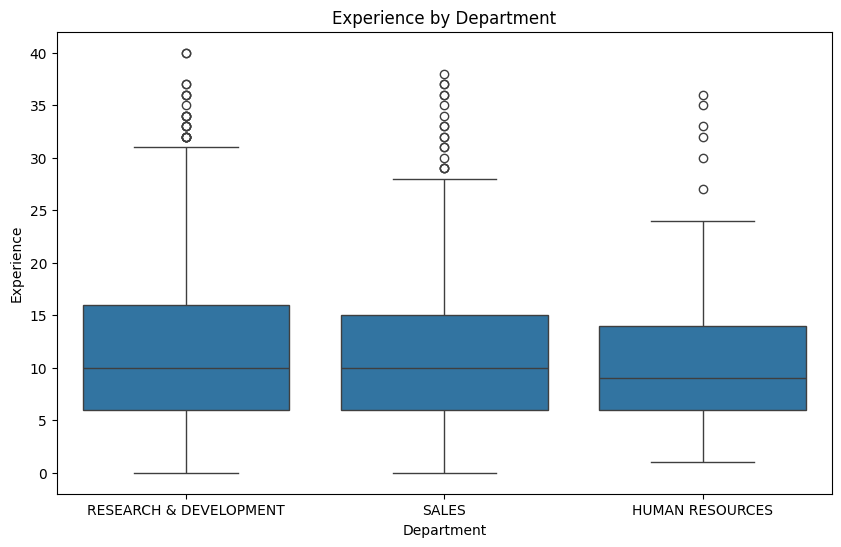

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='TotalWorkingYears', data=df)  # Changed 'Experience' to 'TotalWorkingYears'
plt.title('Experience by Department')
plt.xlabel('Department')
plt.ylabel('Experience')
plt.show()

In [31]:
# Load the dataset
df = pd.read_csv('HR_Analytics.csv')

# Convert 'MonthlyIncome' column to numeric, handling potential errors
df['MonthlyIncome'] = pd.to_numeric(df['MonthlyIncome'], errors='coerce')

#Import numpy and alias it as np
import numpy as np

std_devs = df.select_dtypes(include=np.number).std()  # Calculate std dev only for numeric columns

highest_std_dev_feature = std_devs.idxmax()
highest_std_dev_value = std_devs.max()

print("Feature with the highest standard deviation:", highest_std_dev_feature)
print("Highest standard deviation value:", highest_std_dev_value)

Feature with the highest standard deviation: MonthlyRate
Highest standard deviation value: 7112.0568016419575
